## Producing a figure similar to Figure 2 of the Holme-Newman paper

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from ipywidgets import interact, interactive, fixed

output_path = '/cluster/home/buchsr/output'
save_path = '/cluster/home/buchsr/opinion-formation/media'

### For a graph with n = 800, m = 1600

In [6]:
tag = 'fig3'
n = 800
m = 2*n
n_iter = 1000
phis_interest = [0.04, 0.46, 0.96]

In [7]:
list_files = glob.glob('{0}/ComponentsSize_{1}_n{2}_m{3}_gamma10_niter{4}_phi*.npy'.format(output_path, tag, n, m,
                                                                                           n_iter))
phis = [float(f.split('phi_')[1].split('.npy')[0]) for f in list_files]
idx = np.argsort(phis)
phis = np.array(phis)[idx]
list_files = np.array(list_files)[idx]

In [8]:
dfs = [np.load(path) for path in list_files]
size = np.arange(dfs[0].shape[1])

In [9]:
def plot_dist(i, dfs, size, phis, rescale=True):
    fig, ax = plt.subplots(figsize=(12, 6))

    df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
    if rescale==True:
        biggest_community = size[df_proba!=0].max()
    else:
        biggest_community = len(size)
        
    y = df_proba[1:biggest_community]#*size[1:biggest_community]
    y = y/y.sum()

    ax.scatter(size[1:biggest_community], y, color='C1')

    ax.set_title('phi={0}'.format(phis[i]))
    ax.set_xlabel('$s$', fontsize=26)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((1e-5,1))
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)

In [10]:
interact(plot_dist, i=(0,100,1), dfs=fixed(dfs), size=fixed(size), phis=fixed(phis), rescale=True)

interactive(children=(IntSlider(value=50, description='i'), Checkbox(value=True, description='rescale'), Outpu…

<function __main__.plot_dist(i, dfs, size, phis, rescale=True)>

range in sizes: 15 100
[-2.63348156  3.42138519]


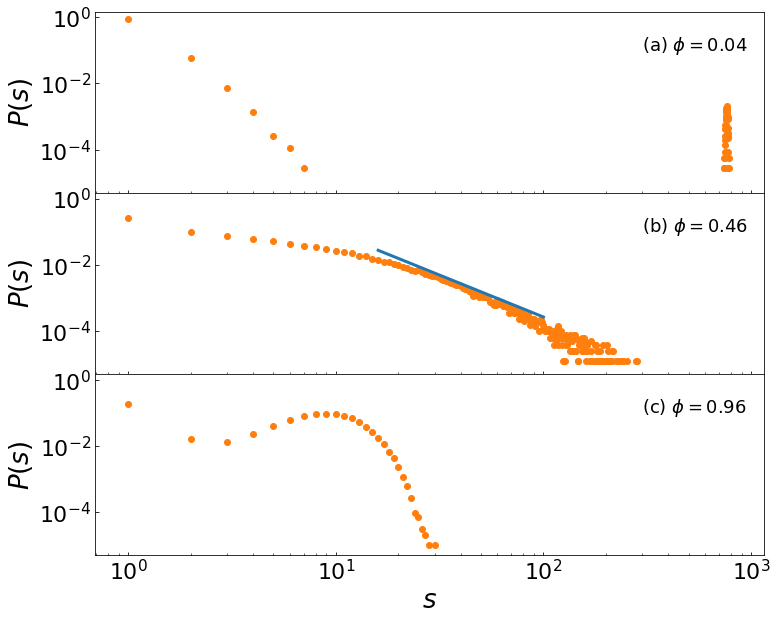

In [18]:
fig, ax = plt.subplots(figsize=(12, 10), nrows=3, sharex=True)
rescale=False
set_phi = [4, 46, 96]
letter = 'abc'
for idx, (i,l) in enumerate(zip(set_phi, letter)):
    df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
    if rescale==True:
        biggest_community = size[df_proba!=0].max()
    else:
        biggest_community = len(size)

    x = size[1:biggest_community]    
    y = df_proba[1:biggest_community]
    
    if idx==1:
        data = (dfs[i].transpose()/dfs[i].sum(axis=1))
        rangefit = [15, 100]
        rangeplot = rangefit
        logx = np.log(x[rangefit[0]:rangefit[1]])
        logy = np.log(y[rangefit[0]:rangefit[1]])
        coeffs = np.polyfit(logx,logy,deg=1)
        print('range in sizes:', rangefit[0], rangefit[1])
        print(coeffs)
        coeffs[0]+=0.1
        poly = np.poly1d(coeffs)
        yfit = lambda x: np.exp(poly(np.log(x)))
        ax[idx].plot(x[rangeplot[0]:rangeplot[1]], yfit(x[rangeplot[0]:rangeplot[1]]), linewidth=3)

    ax[idx].scatter(size[1:biggest_community], y, color='C1')
    ax[idx].set_xscale('log')
    ax[idx].set_yscale('log')
    ax[idx].set_ylim((5e-6,1.5))
    ax[idx].set_ylabel('$P(s)$', fontsize=26)
    ax[idx].tick_params(labelsize=22, direction='in', which='both')
    ax[idx].text(300, 1e-1, '({0}) $\phi = {1}$'.format(l, phis[i]), fontsize=18)
ax[2].set_xlabel('$s$', fontsize=26)
plt.subplots_adjust(hspace=0)
#plt.tight_layout()
#plt.savefig(save_path + '/Fig2_n800_m1600.png', dpi=300, format='png')
#plt.savefig(save_path + '/Fig2_n800_m1600.pdf', dpi=300, format='pdf')

Let's see the sensitivity in the range over which the fit is made

In [33]:
i=46
df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
all_coeffs = []
for fdfd in range(1000):
    rangefit = np.random.choice(np.arange(15, 101,1), 2)
    rangefit = np.sort(rangefit)
    if (rangefit[1]-rangefit[0])> 30:
        x = size[1:]    
        y = df_proba[1:]
        data = (dfs[i].transpose()/dfs[i].sum(axis=1))
        logx = np.log(x[rangefit[0]:rangefit[1]])
        logy = np.log(y[rangefit[0]:rangefit[1]])
        coeffs = np.polyfit(logx,logy,deg=1)
        #print('range in sizes:', rangefit[0], rangefit[1])
        #print(coeffs)
        all_coeffs.append(coeffs[1])
all_coeffs = np.array(all_coeffs)

In [34]:
print(len(all_coeffs))
print(all_coeffs.mean())
print(all_coeffs.std())

425
4.160178097358798
0.9737193248819122


Playing around with the range of the fit.

[-2.52459376  2.97154687]


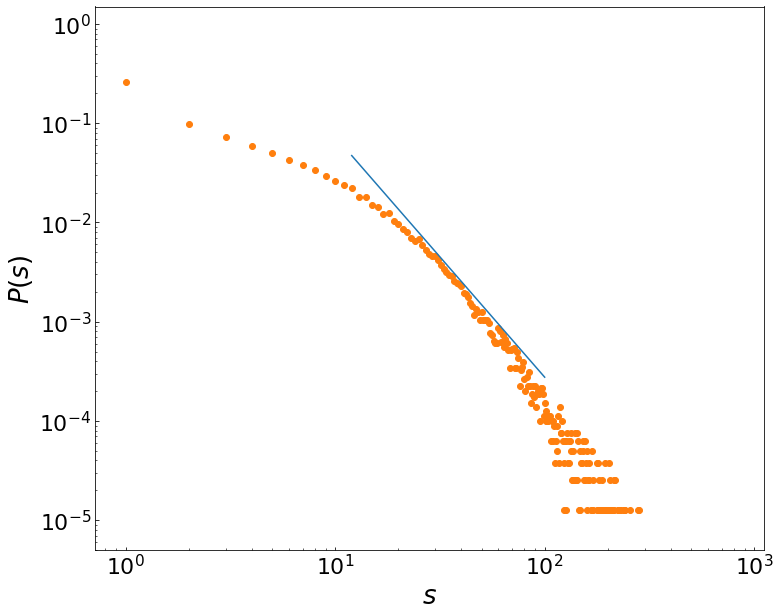

In [35]:
fig, ax = plt.subplots(figsize=(12, 10))
rescale=False
i = 46
df_proba = dfs[i].sum(axis=0)/dfs[i].sum()
if rescale==True:
    biggest_community = size[df_proba!=0].max()
else:
    biggest_community = len(size)

x = size[1:biggest_community]    
y = df_proba[1:biggest_community]


ax.scatter(x, y, color='C1')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim((5e-6,1.5))
ax.set_ylabel('$P(s)$', fontsize=26)
ax.tick_params(labelsize=22, direction='in', which='both')
ax.set_xlabel('$s$', fontsize=26)
#plt.tight_layout()

rangefit = [11, 100]
rangeplot = rangefit
logx = np.log(x[rangefit[0]:rangefit[1]])
logy = np.log(y[rangefit[0]:rangefit[1]])
coeffs = np.polyfit(logx,logy,deg=1)
print(coeffs)
coeffs[0]+=0.1
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))
ax.plot(x[rangeplot[0]:rangeplot[1]], yfit(x[rangeplot[0]:rangeplot[1]]))

Trying to make sense of the logarthmic bining of the Holme-Newman paper

In [36]:
def plot_dist_binlog(i, dfs, size, phis, n_space):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    all_communities = []
    for s in size:
        all_communities += int(dfs[i].sum(axis=0)[s])*[s]
    
    bins = np.logspace(np.log10(1),np.log10(n), n_space)
    midbin = np.logspace(np.log10(1),np.log10(n), n_space*2)[1::2][:-1]
    
    hist = np.histogram(all_communities, bins=bins, density=True)[0]
    y = hist*midbin
    y = y/y.sum()
    ax.scatter(midbin, y, color='C1')

    ax.set_title('phi={0}'.format(phis[i]))
    ax.set_xlabel('$s$', fontsize=26)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((1e-5,1))
    ax.set_ylabel('$P(s)$', fontsize=26)
    ax.tick_params(labelsize=22)

In [37]:
interact(plot_dist_binlog, i=(0,100,1), dfs=fixed(dfs), size=fixed(size), phis=fixed(phis), n_space=(10, 50,1))

interactive(children=(IntSlider(value=50, description='i'), IntSlider(value=30, description='n_space', max=50,…

<function __main__.plot_dist_binlog(i, dfs, size, phis, n_space)>